In [1]:


"""
DATA MANIPULATİNG
"""
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

"""
NATURAL LANGUAGE PROCESSING
"""
import re 
import nltk 
from sklearn.feature_extraction.text import CountVectorizer

"""
PYTORCH
"""

import torch
import torch.nn as nn


"""
VISUALIZATION TOOLS
"""

import matplotlib.pyplot as plt
import seaborn as sns

"""
TRAIN TEST SPLIT
"""
from sklearn.model_selection import train_test_split

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


In [24]:
true_data = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/True.csv')
fake_data = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/Fake.csv')
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


* Our data does not splitted as train and test. It splitted as true and false, so we will split them into train and test, but before this we will concatenate them.

In [25]:
true_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [26]:
fake_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [27]:
# Adding labels 
true_data["label"] = np.ones(len(true_data),dtype=int)
fake_data["label"] = np.zeros(len(fake_data),dtype=int)

true_data.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [28]:
true_data[:10]

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",1
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",1
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",1


* And now we will concatenate and shuffle them

In [29]:
data = pd.concat((true_data,fake_data),axis=0)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB
None


In [30]:
data = data.sample(frac=1)
data.head(10)

,title,text,subject,date,label
12154,BREAKING: TRUMP ANNOUNCES Nominee For Secretar...,Leading Republicans have already expressed an...,politics,"Dec 13, 2016",0
3109,U.S. State Department questions Gulf motives o...,WASHINGTON (Reuters) - The U.S. State Departme...,politicsNews,"June 20, 2017",1
23262,Boiler Room EP #74 – Dustification & The Crook...,Tune in to the Alternate Current Radio Network...,Middle-east,"September 14, 2016",0
10518,TRUMP ADVISOR Has Warning For Syria That Has S...,Deputy Assistant to the President Sebastian Go...,politics,"Jun 28, 2017",0
18701,WATCH TUCKER CARLSON’S Heated Debate With Delu...,"Tucker Carlson interviews Jose Antonio Vargas,...",left-news,"May 3, 2017",0
14756,COPYCAT DEMS Fundraise Off Of Trump Lookalike Hat,Can they not find something original? The Demo...,politics,"Dec 23, 2015",0
15923,LAWYER FOR FBI INFORMANT: My Client Knows What...,The lawyer for the FBI informant under a gag o...,Government News,"Oct 24, 2017",0
10225,U.S. says it may not need Apple to open San Be...,(Reuters) - U.S. prosecutors said Monday that ...,politicsNews,"March 21, 2016",1
20481,WHY ARE VAN LOADS OF ILLEGALS Being Moved and ...,The insanity continues! The outrageous invasio...,left-news,"Jun 3, 2016",0
11143,California considers tighter lobbying rules as...,"SACRAMENTO, Calif. (Reuters) - California’s el...",politicsNews,"January 21, 2016",1


* Our data is ready, let's examine it!

# Data Overview

In this section we will meet with the data. We will check these:

* Is the data unbalanced?
* How many classes in subject feature?


## Is The Data Unbalanced?

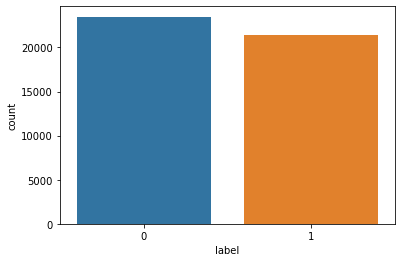

In [31]:
sns.countplot(data["label"])
plt.show()

* Fake news are a bit more but it does not create a problem. So, we can say that our data is balanced.

## How Many Classes In Subject Feature


In [32]:
data["subject"].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

* There are 8 type of subjects in the dataset.
* Most of the dataset's label is politicsNews
* We should encode this feature.

# Data Preprocessing

In this section I will prepare the dataset for deep learning. I will follow two main steps:

1. Other Preprocessings
1. Natural Language Processing

## Other Preprocessings

In this main step, I will follow these steps:

1. Subject Feature - One Hot Encoding
1. Dropping Date

In [33]:
data = pd.get_dummies(data,columns=["subject"])
data.head()

,title,text,date,label,subject_Government News,subject_Middle-east,subject_News,subject_US_News,subject_left-news,subject_politics,subject_politicsNews,subject_worldnews
12154,BREAKING: TRUMP ANNOUNCES Nominee For Secretar...,Leading Republicans have already expressed an...,"Dec 13, 2016",0,0,0,0,0,0,1,0,0
3109,U.S. State Department questions Gulf motives o...,WASHINGTON (Reuters) - The U.S. State Departme...,"June 20, 2017",1,0,0,0,0,0,0,1,0
23262,Boiler Room EP #74 – Dustification & The Crook...,Tune in to the Alternate Current Radio Network...,"September 14, 2016",0,0,1,0,0,0,0,0,0
10518,TRUMP ADVISOR Has Warning For Syria That Has S...,Deputy Assistant to the President Sebastian Go...,"Jun 28, 2017",0,0,0,0,0,0,1,0,0
18701,WATCH TUCKER CARLSON’S Heated Debate With Delu...,"Tucker Carlson interviews Jose Antonio Vargas,...","May 3, 2017",0,0,0,0,0,1,0,0,0


In [34]:
data = data.drop("date",axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 12154 to 13137
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   title                    44898 non-null  object
 1   text                     44898 non-null  object
 2   label                    44898 non-null  int64 
 3   subject_Government News  44898 non-null  uint8 
 4   subject_Middle-east      44898 non-null  uint8 
 5   subject_News             44898 non-null  uint8 
 6   subject_US_News          44898 non-null  uint8 
 7   subject_left-news        44898 non-null  uint8 
 8   subject_politics         44898 non-null  uint8 
 9   subject_politicsNews     44898 non-null  uint8 
 10  subject_worldnews        44898 non-null  uint8 
dtypes: int64(1), object(2), uint8(8)
memory usage: 3.0+ MB


## Natural Language Processing
Finally we came our most important step, natural language processing. In this step, I will process text and label features. I will start with the text

In [35]:
new_text = []
pattern = "[^a-zA-Z]"
lemma = nltk.WordNetLemmatizer()

for txt in data.text:
    
    txt = re.sub(pattern," ",txt) # Cleaning
    txt = txt.lower() # Lowering
    txt = nltk.word_tokenize(txt) # Tokenizing
    txt = [lemma.lemmatize(word) for word in txt] # Lemmatizing
    txt = " ".join(txt)
    new_text.append(txt)
    
    
new_text[0]
    

'leading republican have already expressed anxiety about tillerson a they contend with intelligence assessment saying that russia meddled in the u s presidential election to help turn the table trump s way fox newsthe rinos will certainly join in with their concern just like marco rubio did in a tweet being a friend of vladimir is not an attribute i am hoping for from a secretaryofstate sen marco rubiopresident elect donald trump announced tuesday that he intends to nominate exxonmobil ceo rex tillerson for secretary of state tillerson impressed trump during the two meeting he had with him trump had high praise for the energy titan calling him a world class player he s in charge of an oil company that s pretty much double the size of his next nearest competitor trump told host chris wallace it s been a company that s been unbelievably managed and to me a great advantage is he know many of the player and he know them well he doe massive deal in russia he doe massive deal for the company

In [36]:
new_title = []
for txt in data.title:
    
    txt = re.sub(pattern," ",txt) # Cleaning
    txt = txt.lower() # Lowering
    txt = nltk.word_tokenize(txt) # Tokenizing
    txt = [lemma.lemmatize(word) for word in txt] # Lemmatizing
    txt = " ".join(txt)
    new_title.append(txt)
new_title[0]


'breaking trump announces nominee for secretary of state liberal head explode'

* And now I am going to create sparce matrixes.


In [37]:
vectorizer_title = CountVectorizer(stop_words="english",max_features=1000)
vectorizer_text = CountVectorizer(stop_words="english",max_features=4000)

title_matrix = vectorizer_title.fit_transform(new_title).toarray() 
text_matrix = vectorizer_text.fit_transform(new_text).toarray()

print("Finished")

Finished


* And now let's concatenate everything.

In [38]:
data.head()

,title,text,label,subject_Government News,subject_Middle-east,subject_News,subject_US_News,subject_left-news,subject_politics,subject_politicsNews,subject_worldnews
12154,BREAKING: TRUMP ANNOUNCES Nominee For Secretar...,Leading Republicans have already expressed an...,0,0,0,0,0,0,1,0,0
3109,U.S. State Department questions Gulf motives o...,WASHINGTON (Reuters) - The U.S. State Departme...,1,0,0,0,0,0,0,1,0
23262,Boiler Room EP #74 – Dustification & The Crook...,Tune in to the Alternate Current Radio Network...,0,0,1,0,0,0,0,0,0
10518,TRUMP ADVISOR Has Warning For Syria That Has S...,Deputy Assistant to the President Sebastian Go...,0,0,0,0,0,0,1,0,0
18701,WATCH TUCKER CARLSON’S Heated Debate With Delu...,"Tucker Carlson interviews Jose Antonio Vargas,...",0,0,0,0,0,1,0,0,0


In [39]:
data.drop(["title","text"],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 12154 to 13137
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   label                    44898 non-null  int64
 1   subject_Government News  44898 non-null  uint8
 2   subject_Middle-east      44898 non-null  uint8
 3   subject_News             44898 non-null  uint8
 4   subject_US_News          44898 non-null  uint8
 5   subject_left-news        44898 non-null  uint8
 6   subject_politics         44898 non-null  uint8
 7   subject_politicsNews     44898 non-null  uint8
 8   subject_worldnews        44898 non-null  uint8
dtypes: int64(1), uint8(8)
memory usage: 2.3 MB


In [40]:
print(data.shape)
print(title_matrix.shape)
print(text_matrix.shape)

(44898, 9)
(44898, 1000)
(44898, 4000)


In [41]:
# Creating Y
y = data.label
# Creating X
x = np.concatenate((np.array(data.drop("label",axis=1)),title_matrix,text_matrix),axis=1)



* Lets check our shapes, after that I am going to split X and Y into train and test.

In [42]:
print(x.shape)
print(y.shape)

(44898, 5008)
(44898,)


In [71]:
from sklearn.model_selection import train_test_split

# Train Test Split
X_train,X_test,Y_train,Y_test = train_test_split(x,np.array(y),test_size=0.25,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(33673, 5008)
(11225, 5008)
(33673,)
(11225,)


# Building Model Using Pytorch

Our data is ready, now we are going to build our ANN model using pytorch. We will use ReLU as activation function, Adam as optimizer and Cross Entropy as Loss. Let's start.

In [2]:
class ANN(nn.Module):
    
    def __init__(self):
        
        super(ANN,self).__init__() # Inhertiting
        
        self.linear1 = nn.Linear(5008,2000) # IN 5008 OUT 2000
        self.relu1 = nn.ReLU() # Actfunc 1
        
        self.linear2 = nn.Linear(2000,500) # IN 2000 OUT 500
        self.relu2 = nn.ReLU()
        
        self.linear3 = nn.Linear(500,100) # IN 500 OUT 100
        self.relu3 = nn.ReLU()
        
        self.linear4 = nn.Linear(100,20) # IN 100 OUT 20
        self.relu4 = nn.ReLU()
        
        self.linear5 = nn.Linear(20,2) # IN 20 OUT 2 | OUTPUT 
        
    
    def forward(self,x):
        
        out = self.linear1(x) # Input Layer 
        out = self.relu1(out)
        
        out = self.linear2(out) # Hidden Layer 1 
        out = self.relu2(out)
        
        out = self.linear3(out) # Hidden Layer 2 
        out = self.relu3(out)
        
        out = self.linear4(out) # Hidden Layer 3 
        out = self.relu4(out)

        
        out = self.linear5(out) # Output Layer
        
        return out
    

model = ANN()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
error = nn.CrossEntropyLoss()
pytorch_total_params = sum(p.numel() for p in model.parameters())
print(pytorch_total_params)

11070662


* Our model have built, now let's train it using our data.

# Fitting Model Using Pytorch

And in this stage, I will fit the model using our prepared data. I will use a for loop in order to train.

In [72]:
# Converting numpy arrays into pytorch tensors
X_train = torch.Tensor(X_train)

# You must convert it into LongTensor. I did it once
Y_train = torch.Tensor(Y_train).type(torch.LongTensor)

X_test = torch.Tensor(X_test)
Y_test = torch.Tensor(Y_test)

EPOCHS = 20

for epoch in range(EPOCHS):
    
    # Clearing gradients
    optimizer.zero_grad()
    
    # Forward Propagation
    outs = model(X_train)
    
    # Computing Loss
    loss = error(outs,Y_train)
    
    # Backward propagation
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # Printing loss
    print(f"Loss after iteration {epoch} is {loss}")

Loss after iteration 0 is 0.6949915885925293
Loss after iteration 1 is 4.400624752044678
Loss after iteration 2 is 2.0731403827667236
Loss after iteration 3 is 0.722135603427887
Loss after iteration 4 is 1.0666370391845703
Loss after iteration 5 is 0.789239227771759
Loss after iteration 6 is 0.7848457098007202
Loss after iteration 7 is 0.6145092248916626
Loss after iteration 8 is 0.39348533749580383
Loss after iteration 9 is 0.3296559453010559
Loss after iteration 10 is 0.3076745867729187
Loss after iteration 11 is 0.24567171931266785
Loss after iteration 12 is 0.20053930580615997
Loss after iteration 13 is 0.17751935124397278
Loss after iteration 14 is 0.15604861080646515
Loss after iteration 15 is 0.12716512382030487
Loss after iteration 16 is 0.10061610490083694
Loss after iteration 17 is 0.08512314409017563
Loss after iteration 18 is 0.0747552216053009
Loss after iteration 19 is 0.0619850680232048


# Evaulating Results

Our model have trained. Now I am going to predict X_test and after that I will evaulate the results.

In [73]:
# Importing metrics
from sklearn.metrics import accuracy_score,confusion_matrix


# Prediction
y_head = model(X_test)
print(y_head[0])
# Converting Prediction into labels
y_pred = torch.max(y_head,1)[1]
print(y_pred[0])

# Accuracy score
print("Model accuracy is ",accuracy_score(y_pred,Y_test))


tensor([-1.2058,  9.7988], grad_fn=<SelectBackward>)
tensor(1)
Model accuracy is  0.9830734966592427


#### Acuuracy is 98.3%

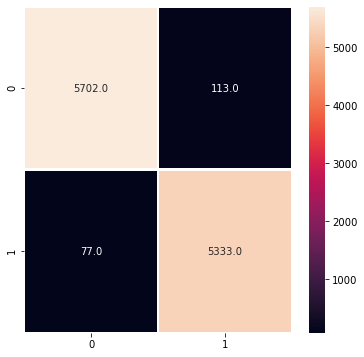

In [74]:
confusion_matrix = confusion_matrix(y_pred=y_pred,y_true=Y_test)

fig,ax = plt.subplots(figsize=(6,6))
sns.heatmap(confusion_matrix,annot=True,fmt="0.1f",linewidths=1.5)
plt.show()